In [1]:
from fastai.collab import *
from fastai.tabular import *

## Collaborative filtering example with a truncated dataset


In [2]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/home/stan_demontmarin/.fastai/data/movie_lens_sample')

In [3]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [4]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [5]:
y_range = [0,5.5]

In [6]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [7]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.601926,0.989592,00:01
1,0.840267,0.679287,00:00
2,0.639047,0.668416,00:00


# Movielens 100k - full dataset try-outs

In [8]:
user,item,title = 'userId','movieId','title'

In [9]:
path=Config.data_path()/'ml-100k'

In [11]:
path.ls()

[PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/mku.sh'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u.user'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u4.test'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u5.base'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u3.base'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u.item'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u.info'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/ub.test'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u1.test'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u2.base'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u.genre'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u.occupation'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/ua.test'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u2.test'),
 PosixPath('/home/stan_demontmarin/.fastai/data/ml-100k/u1.ba

In [12]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [14]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, title, 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
len(ratings)

100000

In [16]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [18]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [19]:
data.show_batch()

userId,title,target
815,Beavis and Butt-head Do America (1996),2.0
425,Shooting Fish (1997),4.0
629,"Devil's Own, The (1997)",3.0
590,Breaking the Waves (1996),4.0
668,Contact (1997),2.0


In [20]:
y_range = [0,5.5]

In [21]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


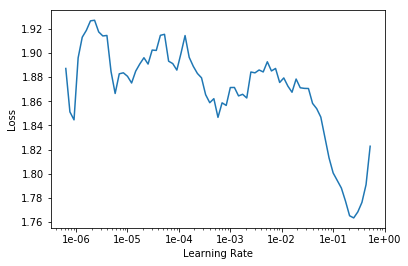

In [22]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [23]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.947357,0.951475,00:05
1,0.847520,0.886505,00:05
2,0.802611,0.832787,00:05
3,0.657090,0.818945,00:05
4,0.554762,0.818854,00:05


In [24]:
learn.save('dotprod')

## Interpretation

In [25]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [27]:
g = rating_movie.groupby(title)['rating'].count()
g


title
'Til There Was You (1997)                                     9
1-900 (1994)                                                  5
101 Dalmatians (1996)                                       109
12 Angry Men (1957)                                         125
187 (1997)                                                   41
2 Days in the Valley (1996)                                  93
20,000 Leagues Under the Sea (1954)                          72
2001: A Space Odyssey (1968)                                259
3 Ninjas: High Noon At Mega Mountain (1998)                   5
39 Steps, The (1935)                                         59
8 1/2 (1963)                                                 38
8 Heads in a Duffel Bag (1997)                                4
8 Seconds (1994)                                              4
A Chef in Love (1996)                                         8
Above the Rim (1994)                                          5
Absolute Power (1997)             

In [28]:
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie Bias

In [29]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [30]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [31]:
item0 = lambda o:o[0]

In [32]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3755),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3236),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3138), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2844), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2747), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2606), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2490), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2407), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2389), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2375), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2330), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2315), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2234), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2196), 'Home Alone 3 (1997)', 1.894736842105263),
 (tensor(-0.2169), 'Barb Wire (1996)', 

In [33]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6343), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5765), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5563), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5499), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5474), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5362), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5329), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5094), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4975), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4691), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4653), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4558), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667),
 (tensor(0.4550), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4529), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4490), 'Close Shave, A (1995)', 4.491071428571429)]

### Movie weights

In [34]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [35]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [36]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [37]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0821), 'Lawrence of Arabia (1962)'),
 (tensor(1.0451), 'Casablanca (1942)'),
 (tensor(1.0448), 'Close Shave, A (1995)'),
 (tensor(1.0125), 'Wrong Trousers, The (1993)'),
 (tensor(1.0039), 'Chinatown (1974)'),
 (tensor(0.9672), 'Godfather, The (1972)'),
 (tensor(0.9533), 'When We Were Kings (1996)'),
 (tensor(0.9176), '12 Angry Men (1957)'),
 (tensor(0.9167), 'Third Man, The (1949)'),
 (tensor(0.9144), 'Citizen Kane (1941)')]

In [38]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2666), 'Home Alone 3 (1997)'),
 (tensor(-1.2421), "McHale's Navy (1997)"),
 (tensor(-1.2219), 'Jungle2Jungle (1997)'),
 (tensor(-1.2105), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.1467), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.0942), 'Congo (1995)'),
 (tensor(-1.0897), 'Leave It to Beaver (1997)'),
 (tensor(-1.0591), 'Grease 2 (1982)'),
 (tensor(-1.0575), 'Richie Rich (1994)'),
 (tensor(-1.0524), 'Bio-Dome (1996)')]